In [227]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [22]:
def print_title(title):
    print(f'\n{'-'*120}\n\033[1m{title}\033[0m')
def print_section(title):
    print(f'{'-'*120}\n{title}\n{'-'*120}')

# (1) Loading And Preprocessing

#### Importing and creating iris data frame form sklearn 

In [66]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['target'] = iris_data.target 

In [68]:
print_title('Data set Head')
print_section(iris.head(3))


------------------------------------------------------------------------------------------------------------------------
Data set Head
------------------------------------------------------------------------------------------------------------------------
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   target  
0       0  
1       0  
2       0  
------------------------------------------------------------------------------------------------------------------------


In [70]:
print_title('Data set Tail')
print_section(iris.tail(3))


------------------------------------------------------------------------------------------------------------------------
Data set Tail
------------------------------------------------------------------------------------------------------------------------
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
147       2  
148       2  
149       2  
------------------------------------------------------------------------------------------------------------------------


In [72]:
print_title('Data set information')
print_section(iris.info())


------------------------------------------------------------------------------------------------------------------------
Data set information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
------------------------------------------------------------------------------------------------------------------------
None
------------------------------------------------------------------------------------------------------------------------


In [74]:
print_title('Data set Description')
print_section(iris.describe())


------------------------------------------------------------------------------------------------------------------------
Data set Description
------------------------------------------------------------------------------------------------------------------------
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232 

In [76]:
print_title('finding null valuse')
print_section(iris.isnull().sum())


------------------------------------------------------------------------------------------------------------------------
finding null valuse
------------------------------------------------------------------------------------------------------------------------
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
------------------------------------------------------------------------------------------------------------------------


In [78]:
print_title('Correlation')
print_section(iris.corr())


------------------------------------------------------------------------------------------------------------------------
Correlation
------------------------------------------------------------------------------------------------------------------------
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000

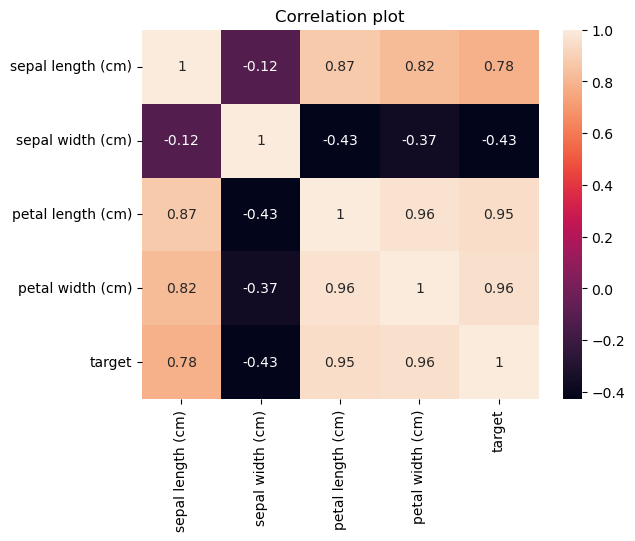

In [120]:
plt.title('Correlation plot')
sns.heatmap(iris.corr(),annot=True)
plt.show()

In [209]:
iris['target'].unique()

array([0, 1, 2])

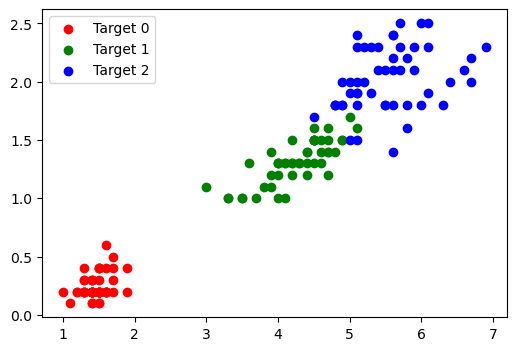

In [211]:
plt.figure(figsize=(6,4))
iris1 = iris[iris['target']==0]
iris2 = iris[iris['target']==1]
iris3 = iris[iris['target']==2]
plt.scatter(iris1['petal length (cm)'],iris1['petal width (cm)'],color='r',label='Target 0')
plt.scatter(iris2['petal length (cm)'],iris2['petal width (cm)'],color='g',label='Target 1')
plt.scatter(iris3['petal length (cm)'],iris3['petal width (cm)'],color='b',label='Target 2')
plt.legend()
plt.show()

#### Drping Target column since this is a clustering problem

In [122]:
iris_df=iris.iloc[:,0:4]

# (2) Clustering Algorithm Implementation

## A)KMeans Clustering

In [134]:
sse

[681.3706,
 152.3479517603579,
 78.8556658259773,
 57.22847321428571,
 49.85280058651026,
 44.05522387742976,
 37.59275,
 35.168657217367745,
 28.10249464570517]

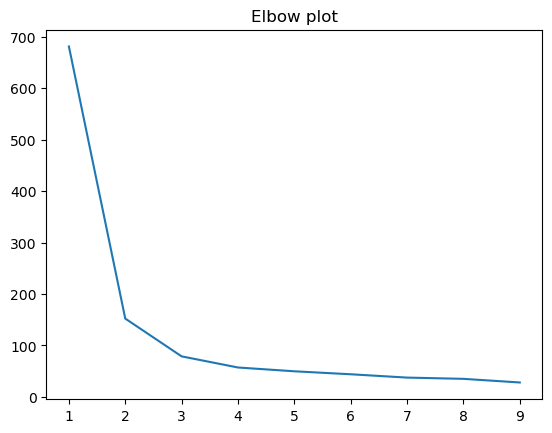

In [142]:
plt.title('Elbow plot')
plt.plot(k_meansclus,sse)
plt.show()

#### Model implimentation 

In [165]:
km1 = KMeans(n_clusters=3,max_iter=300,random_state=0) # crating model using cluster value 3, obtained from elobow plot
y_pred= km1.fit_predict(iris_df)                       # predicting the model
km1.cluster_centers_                                   # creating cluster points
iris_df=np.array(iris_df)                              # converting df to array

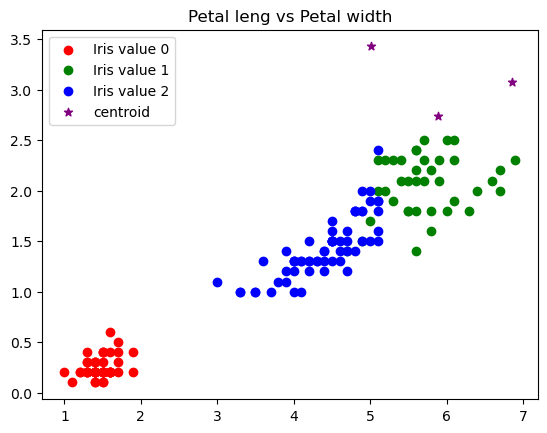

In [187]:
plt.title('Petal leng vs Petal width')
plt.scatter(iris_df[y_pred==1,2],iris_df[y_pred==1,3],color='r',label='Iris value 0')
plt.scatter(iris_df[y_pred==2,2],iris_df[y_pred==2,3],color='g',label='Iris value 1')
plt.scatter(iris_df[y_pred==0,2],iris_df[y_pred==0,3],color='b',label='Iris value 2')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.show()

In [132]:
k_meansclus = range(1,10)     ## creating rage of clistering
sse = []                      ##sum of the squared differences between each observation
for k in k_meansclus:
    km = KMeans(n_clusters=k)
    km.fit(iris_df)
    sse.append(km.inertia_)

## B)Hierarchical Clustering

In [219]:
# separte features and class labels
x_features = iris_data.data
y_labels = iris_data.target

#### Model Implimentaion

In [229]:
# Model creation
model = AgglomerativeClustering(linkage='ward',n_clusters = 3)

In [267]:
#fitting model to the selected featurs
model.fit(x_features)
predicted_labels = model.labels_ #predicting the model
print(f'Number of unque values in prdicted labels is {np.unique(predicted_labels).sum()}')

Number of unque values in prdicted labels is 3


#### Dendrogram Visualization

##### The advantage of Dendrogram is that we don't have to presume any spcific number of cluster like KMean
##### We can get the cluster by cutting Dentrogram at different level

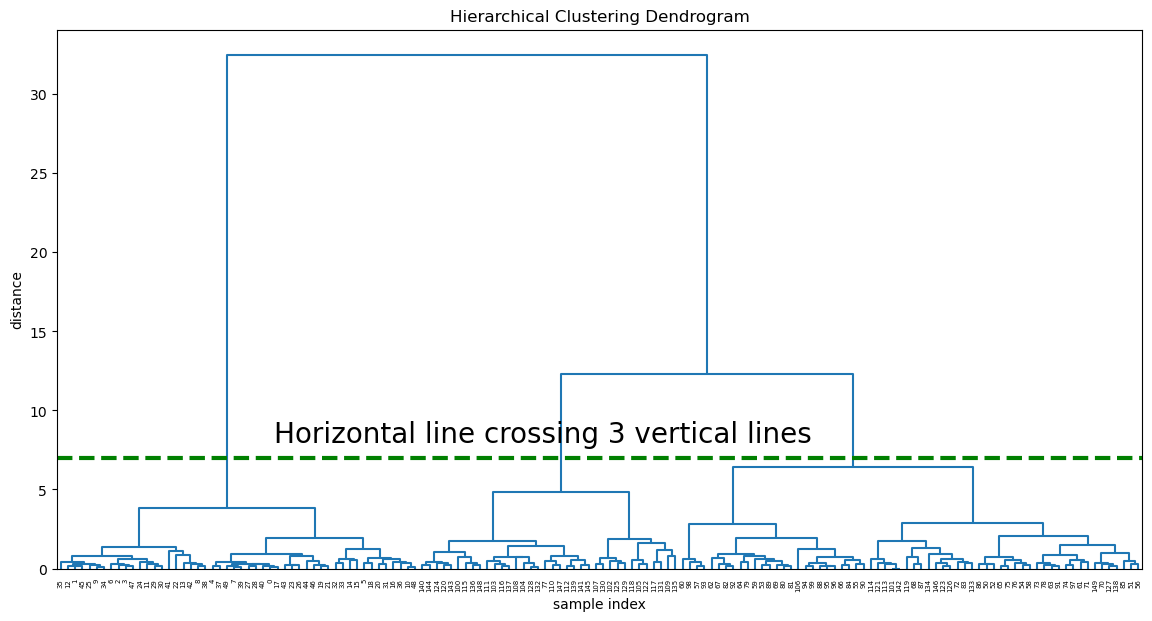


------------------------------------------------------------------------------------------------------------------------
Simplifide Hierachical Clustering Dendrogram
------------------------------------------------------------------------------------------------------------------------
this plot eliminated the more dense area and shows clean simple visualization
------------------------------------------------------------------------------------------------------------------------


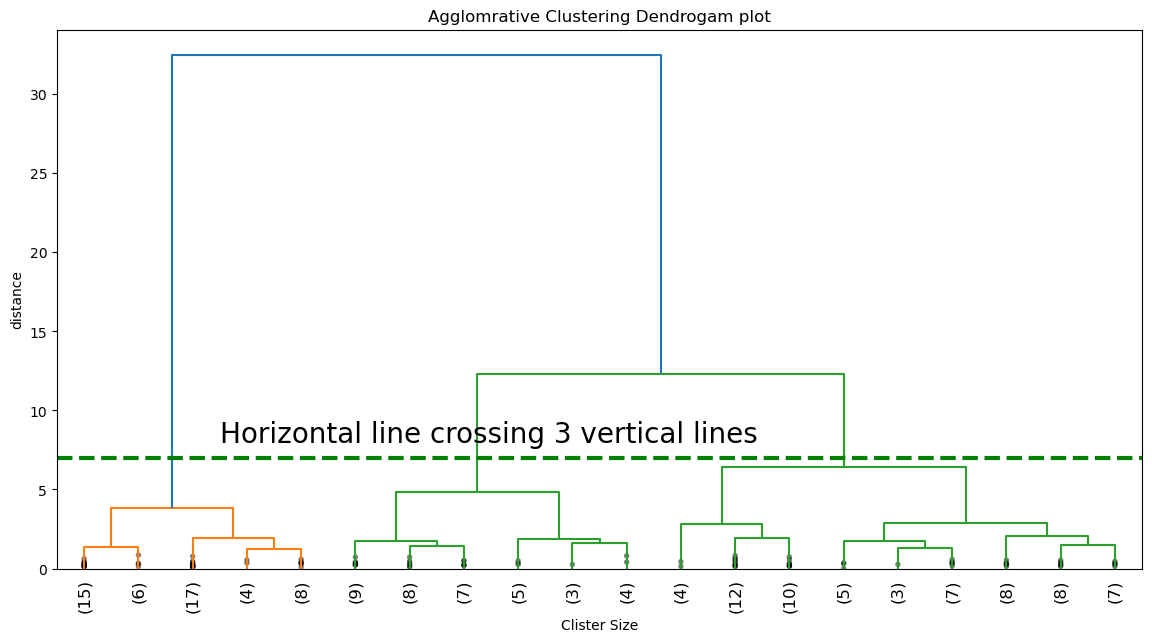

In [337]:
iris_matrix = linkage(x_features,'ward')
plot = plt.figure(figsize = (14,7))
dendrogram(
    iris_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.hlines(y=7,xmin=0,xmax=2000,lw=3,linestyles='--',color='g')
plt.text(x=300,y=8,s='Horizontal line crossing 3 vertical lines',fontsize=20)
plt.show()
print_title('Simplifide Hierachical Clustering Dendrogram')
print_section('this plot eliminated the more dense area and shows clean simple visualization')

plot2 = plt.figure(figsize=(14,7))
dendrogram(
    iris_matrix,
    truncate_mode='lastp',
    p=20, #show only the last 20 merged clisters
    leaf_rotation=90, # rotates the x axis labels
    leaf_font_size=12, # font size for x axis
    show_contracted=True #to get a distributin imprssion in trucated branches
)
plt.title('Agglomrative Clustering Dendrogam plot')
plt.xlabel('Clister Size')
plt.ylabel('distance')
plt.hlines(y=7,xmin=0,xmax=2000,lw=3,linestyles='--',color='g')
plt.text(x=30,y=8,s='Horizontal line crossing 3 vertical lines',fontsize=20)
plt.show()